In [7]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [8]:
%cd "/content/drive/MyDrive/IA/"
!ls

/content/drive/MyDrive/IA
chihuahuas_vs_muffins.h5  example_test	images	model.ipynb  tester.ipynb


In [9]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from keras.preprocessing import image

In [4]:
pip install --upgrade tensorflow

# Carga el modelo preentrenado

In [10]:
model = tf.keras.models.load_model('chihuahuas_vs_muffins.h5')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 156ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 126ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 119ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 139ms/step


<Figure size 640x480 with 0 Axes>

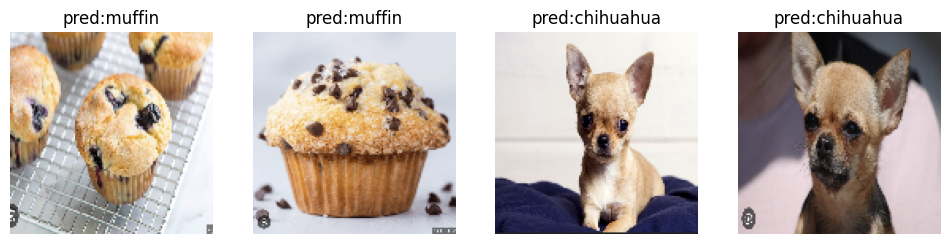

In [11]:
images = ['test1.png','test2.png','test3.png','test4.png']
labels = ["chihuahua", "muffin"]
size = len(images)

plt.figure()
#subplot(r,c) provide the no. of rows and columns
f, axarr = plt.subplots(1, size, figsize=(size*3, 4))

i = 0

for test_img in images:
  img_path = 'example_test/'+ test_img
  img = image.load_img(img_path,  target_size=(128,128))
  img_tensor = image.img_to_array(img)
  img_tensor = np.expand_dims(img_tensor, axis = 0)
  img_tensor /= 255.
  confidence = model.predict(img_tensor)
  predict_class = (confidence > 0.5).astype("int32")
  axarr[i].set_title("pred:" + labels[predict_class[0][0]])
  axarr[i].imshow(img)
  axarr[i].axis("off")
  i = i + 1